
Total count for 00 and 11 are: {'00': 501, '11': 499}


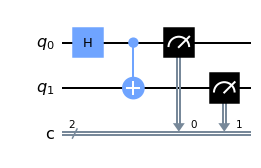

In [6]:
# This cell copied from https://qiskit.org/documentation/getting_started.html with a minor modification to imports
import numpy as np
from qiskit import(QuantumCircuit, execute, Aer, IBMQ, assemble, transpile)
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq.job import job_monitor

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()

In [ ]:
plot_histogram(counts)

In [16]:
provider = IBMQ.load_account()
provider.backends()

AttributeError: 'BackendStatus' object has no attribute 'methods'

In [7]:
backend = provider.backends.ibmq_belem
qobj = assemble(transpile(circuit, backend=backend), backend=backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())
job_monitor(retrieved_job, 30)

Job Status: job is queued (40) [Est. wait time: 53 min 50 sec]

KeyboardInterrupt: 

In [17]:
result = retrieved_job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:", counts)
plot_histogram(counts)

KeyboardInterrupt: 